In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10

In [167]:
from itertools import combinations

from sklearn.model_selection import cross_val_score, train_test_split

import tqdm
import time

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
hitters = pd.read_csv('data/Hitters.csv', index_col=[0])

In [5]:
hitters.describe(include='all')

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322,322,322.000000,322.000000,322.000000,263.000000,322
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,W,NaN,NaN,NaN,NaN,A
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,165,NaN,NaN,NaN,NaN,176
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,NaN,NaN,288.937888,106.913043,8.040373,535.925882,NaN
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,NaN,NaN,280.704614,136.854876,6.368359,451.118681,NaN
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,67.500000,NaN
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,NaN,NaN,109.250000,7.000000,3.000000,190.000000,NaN
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,NaN,NaN,212.000000,39.500000,6.000000,425.000000,NaN
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,NaN,NaN,325.000000,166.000000,11.000000,750.000000,NaN


In [6]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [7]:
hitters['League'] = [1 if i == 'N' else 0 for i in hitters['League']]
hitters['Division'] = [1 if i == 'W' else 0 for i in hitters['Division']]
hitters['NewLeague'] = [1 if i == 'N' else 0 for i in hitters['NewLeague']]

In [8]:
hitters['NewLeague']

-Andy Allanson       0
-Alan Ashby          1
-Alvin Davis         0
-Andre Dawson        1
-Andres Galarraga    1
                    ..
-Willie McGee        1
-Willie Randolph     0
-Wayne Tolleson      0
-Willie Upshaw       0
-Willie Wilson       0
Name: NewLeague, Length: 322, dtype: int64

In [9]:
hitters.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [10]:
hitters = hitters[hitters['Salary'].isnull()==False]

In [11]:
assert hitters.isnull().sum().sum() == 0

In [12]:
features = hitters.columns
target = ['Salary']
features = features.drop(target)

In [20]:
start_time = time.time()

mse_list, feature_list, n_features = [],[], []

for k in tqdm.notebook.trange(1,len(features), desc = 'Loop...'):
    
    all_feature_comb = combinations(features, k)
    
    for features_ in all_feature_comb:
        
        X, y = hitters[list(features_)], hitters[target] 
        reg = LinearRegression()
        reg.fit(X,y)
        mse = mean_squared_error(y, reg.predict(X))
        
        mse_list.append(mse)                  #Append lists
        feature_list.append(features)
        n_features.append(k)
        
end_time = time.time()
print(f"Calculation of {len(mse_list)} combinations took {round(end_time - start_time,0)} seconds")


Calculation of 524286 combinations took 2124.0 seconds


In [21]:
df = pd.DataFrame({'n_features': n_features,'MSE': mse_list, 'features':feature_list})

In [22]:
df['min_MSE'] = df.groupby('n_features')['MSE'].transform(min)

In [23]:
df.sort_values(by="MSE").head(8)

,n_features,MSE,features,min_MSE
524276,18,92022.195280,"Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI'...",92022.195280
524277,18,92032.810222,"Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI'...",92022.195280
524279,18,92047.790617,"Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI'...",92022.195280
524171,17,92051.128352,"Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI'...",92051.128352
524267,18,92055.070963,"Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI'...",92022.195280
524132,17,92061.238338,"Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI'...",92051.128352
524141,17,92065.265439,"Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI'...",92051.128352
524172,17,92070.616010,"Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI'...",92051.128352


/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


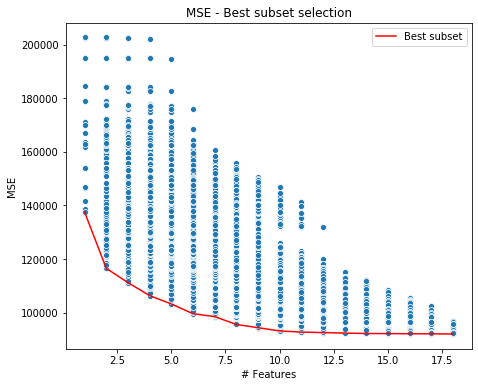

In [26]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax = sns.scatterplot(x='n_features', y='MSE', data=df)

ax.set_xlabel('# Features')
ax.set_ylabel('MSE')
ax.set_title('MSE - Best subset selection')
ax.plot(df.n_features,df.min_MSE,color = 'r', label = 'Best subset')
ax.legend()

plt.show()

The model doesn't seems very good, but this is not the goal here. Also standardization won't help, since the chosen methode (OLS) is invariant to standardization. In case, I would use regularization, standardization is needed.

## Forward stepwise

In [110]:
max_features = len(hitters.columns)-1
selected_features = []

step = 1

mse_list = []
feature_list = []

while len(selected_features) < max_features:
    print(f"Forward step {step}\n")
    best_score = float("inf")
    best_feature = []
    
    for feature in features:
        
        if feature in selected_features:
            continue
            
        X, y = hitters[selected_features + [feature]], hitters[target] 
        reg = LinearRegression()
        reg.fit(X,y)
        mse = mean_squared_error(y, reg.predict(X))
        
        if mse < best_score:
            
            best_score = mse
            best_feature = [feature]

    selected_features.extend(best_feature)
    
    mse_list.append(best_score)

    step += 1

Forward step 1

Forward step 2

Forward step 3

Forward step 4

Forward step 5

Forward step 6

Forward step 7

Forward step 8

Forward step 9

Forward step 10

Forward step 11

Forward step 12

Forward step 13

Forward step 14

Forward step 15

Forward step 16

Forward step 17

Forward step 18

Forward step 19



In [111]:
df2 = pd.DataFrame({'n_features': range(1,len(selected_features)+1),'MSE': mse_list})
df2['features'] = [selected_features[:i] for i in df2['n_features']]

No handles with labels found to put in legend.


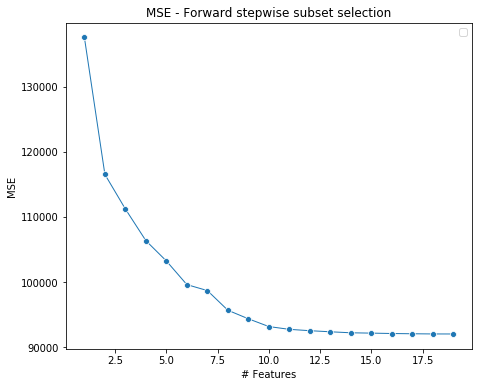

In [112]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax = sns.lineplot(x=df2['n_features'], y=df2['MSE'], lw=1, marker="o")

ax.set_xlabel('# Features')
ax.set_ylabel('MSE')
ax.set_title('MSE - Forward stepwise subset selection')
ax.legend()

plt.show()

In [113]:
m = len(y)
p = max(df2['n_features'])
# better approach would be the minimal mse of the best model search
hat_sigma_square = min(df2['MSE']) * (1/(m - p-1))

df2['C_p'] = (1/m) * (df2['MSE'] + 2 * df2['n_features'] * hat_sigma_square)
df2['AIC'] = (1/(m*hat_sigma_square)) * (df2['MSE'] + 2 * df2['n_features'] * hat_sigma_square)
df2['BIC'] = (1/(m*hat_sigma_square)) * (df2['MSE'] +  np.log(m) * df2['n_features'] * hat_sigma_square)

Text(0, 0.5, 'BIC')

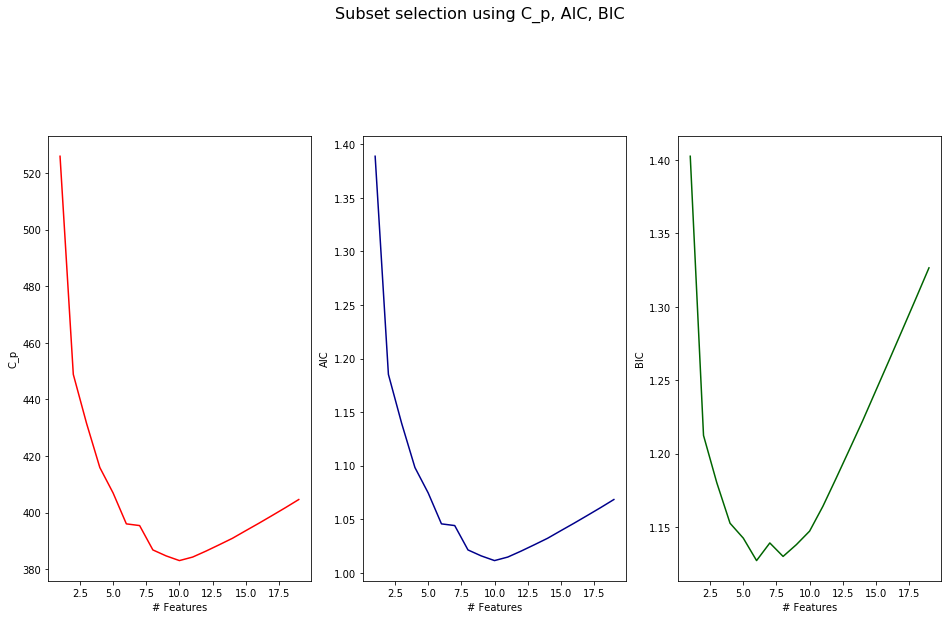

In [114]:
plt.figure(1, figsize=(16, 18))
plt.suptitle('Subset selection using C_p, AIC, BIC', fontsize = 16)

# C_p plot
plt.subplot(231)
ax = sns.lineplot(x=df2['n_features'], y=df2['C_p'], color='red')
plt.xlabel('# Features')
plt.ylabel('C_p')

# AIC plot
plt.subplot(232)
ax = sns.lineplot(x=df2['n_features'], y=df2['AIC'], color='darkblue')
plt.xlabel('# Features')
plt.ylabel('AIC')

# BIC plot
plt.subplot(233)
ax = sns.lineplot(x=df2['n_features'], y=df2['BIC'], color='darkgreen')
plt.xlabel('# Features')
plt.ylabel('BIC')

## Forward stepwise with training - validation dataset

In [118]:
X_train, X_valid, y_train, y_valid = train_test_split(hitters[features], hitters[target], test_size=0.33, random_state=42)

In [149]:
max_features = len(features)
selected_features = []

step = 1

mse_train_list = []
mse_valid_list = []

feature_list = []

while len(selected_features) < max_features:
    
    print(f"Forward step {step}\n")

    best_val_score = float("inf")
    best_feature = []
    
    for feature in features:
        
        if feature in selected_features:
            continue
            
         
        reg = LinearRegression()
        reg.fit(X_train[selected_features + [feature]], y_train)
        y_hat = reg.predict(X_valid[selected_features + [feature]])
        mse_valid = mean_squared_error(y_valid, y_hat)
        
        if mse_valid < best_val_score:
            
            best_val_score = mse_valid
            train_score = mean_squared_error(y_train, reg.predict(X_train[selected_features + [feature]]))
            best_feature = [feature]

    selected_features.extend(best_feature)
    
    mse_train_list.append(train_score)
    mse_valid_list.append(best_val_score)

    step += 1

Forward step 1

Forward step 2

Forward step 3

Forward step 4

Forward step 5

Forward step 6

Forward step 7

Forward step 8

Forward step 9

Forward step 10

Forward step 11

Forward step 12

Forward step 13

Forward step 14

Forward step 15

Forward step 16

Forward step 17

Forward step 18

Forward step 19



In [163]:
df3 = pd.DataFrame({'n_features': range(1,len(selected_features)+1),
                    'error': mse_valid_list,
                    'subset': 'validation'})
df3['features'] = [selected_features[:i] for i in df3['n_features']]

df4 = pd.DataFrame({'n_features': range(1,len(selected_features)+1),
                    'error': mse_train_list,
                    'subset': 'training'})
df4['features'] = [selected_features[:i] for i in df4['n_features']]

df5 = pd.concat([df3, df4])
del([df3, df4])

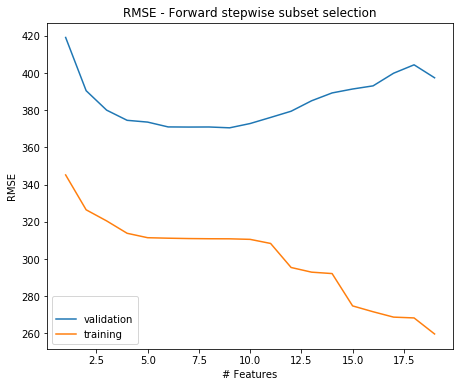

In [166]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax = sns.lineplot(x='n_features', y=np.sqrt(df5['error']), hue='subset', data=df5, legend='brief')

ax.set_xlabel('# Features')
ax.set_ylabel('RMSE')
ax.set_title('RMSE - Forward stepwise subset selection')
# ax.legend()
legend = ax.legend()
legend.texts[0].set_text("")

plt.show()

## Model selection with cross-validation

In [180]:
max_features = len(hitters.columns)-1
selected_features = []

step = 1

cv_list = []
feature_list = []

while len(selected_features) < max_features:
    print(f"Forward step {step}\n")
    best_score = float("inf")
    best_feature = []
    
    for feature in features:
        
        if feature in selected_features:
            continue
            
        X, y = hitters[selected_features + [feature]], hitters[target] 
        reg = LinearRegression()
        cv_mse = cross_val_score(reg, X,y, cv=10, scoring='neg_mean_squared_error')
        
        cv_mse *= -1 
        
        if np.mean(mse) < best_score:
            
            best_score = np.mean(cv_mse)
            best_feature = [feature]

    selected_features.extend(best_feature)
    
    cv_list.append(cv_mse)

    step += 1

Forward step 1

Forward step 2

Forward step 3

Forward step 4

Forward step 5

Forward step 6

Forward step 7

Forward step 8

Forward step 9

Forward step 10

Forward step 11

Forward step 12

Forward step 13

Forward step 14

Forward step 15

Forward step 16

Forward step 17

Forward step 18

Forward step 19



In [188]:
df6 = pd.DataFrame({'n_features': range(1,len(selected_features)+1),
                    'cv_error': cv_list,
                    'mean_cv_error': np.mean(cv_list, axis=1)})
df6['features'] = [selected_features[:i] for i in df6['n_features']]


No handles with labels found to put in legend.


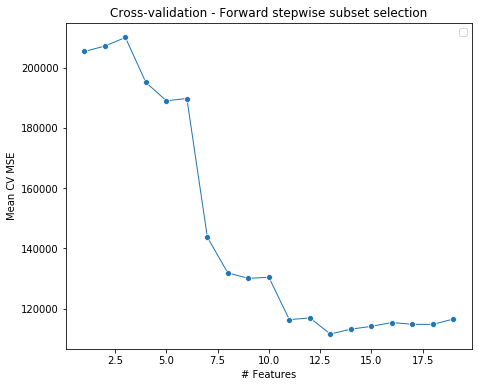

In [189]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax = sns.lineplot(x=df6['n_features'], y=df6['mean_cv_error'], lw=1, marker="o")

ax.set_xlabel('# Features')
ax.set_ylabel('Mean CV MSE')
ax.set_title('Cross-validation - Forward stepwise subset selection')
ax.legend()

plt.show()

## Regularization

In [253]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import MinMaxScaler

In [208]:
hitters_stand = MinMaxScaler().fit_transform(hitters)
hitters_stand = pd.DataFrame(hitters_stand, columns=hitters.columns)

### Ridge

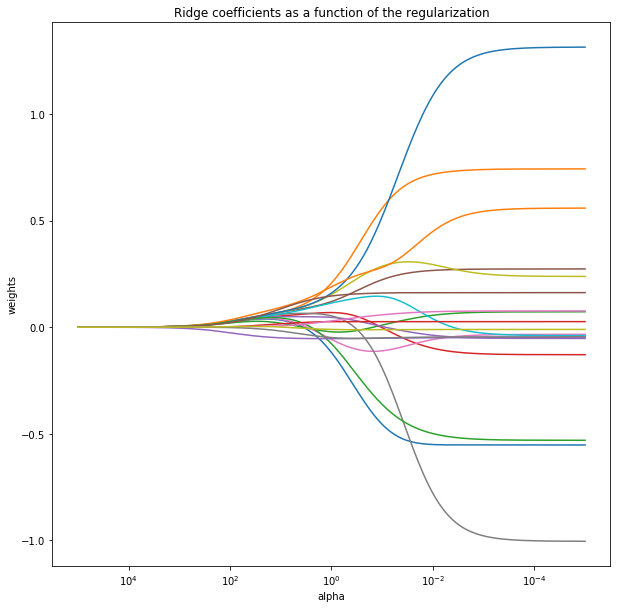

In [353]:
n_alphas = 201
alphas = np.logspace(-5, 5, n_alphas)

X, y = hitters_stand[list(features)].values, hitters_stand[target].values 

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_.reshape(-1))


ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [354]:
X, y = hitters_stand[list(features)].values, hitters_stand[target].values 

ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X, y)
cv_mse = np.mean(ridge.cv_values_, axis=0).reshape(-1)

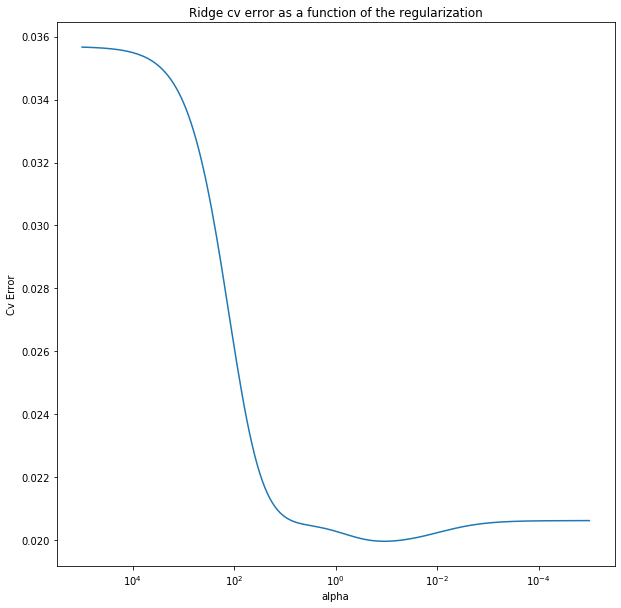

In [355]:
ax = plt.gca()

ax.plot(alphas, cv_mse)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('Cv Error')
plt.title('Ridge cv error as a function of the regularization')
plt.axis('tight')
plt.show()

### Lasso

In [372]:
n_alphas = 201
alphas = np.logspace(-5, 5, n_alphas)

X, y = hitters_stand[list(features)].values, hitters_stand[target].values 

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_.reshape(-1))


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02355019812586745, tolerance: 0.0009314917684228795
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01965863539773327, tolerance: 0.0009314917684228795
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01584670944079747, tolerance: 0.0009314917684228795
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

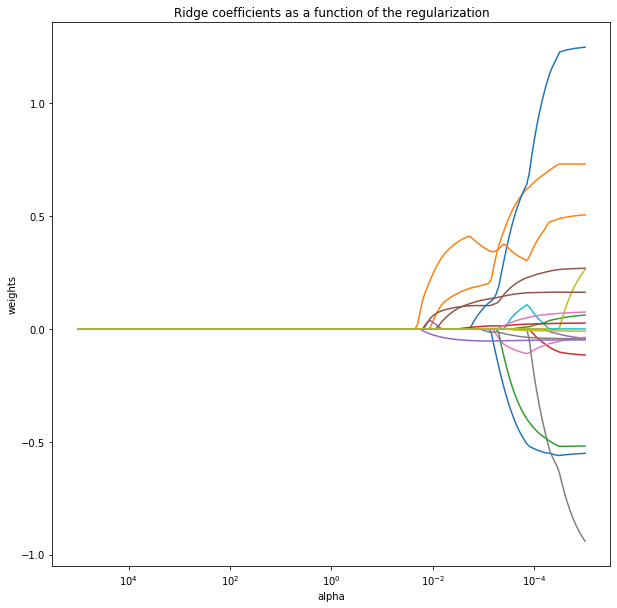

In [373]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [374]:
X, y = hitters_stand[list(features)].values, hitters_stand[target].values 

lasso = LassoCV(alphas=alphas, cv=10)
lasso.fit(X, y)
cv_mse = np.mean(lasso.mse_path_,axis=1)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


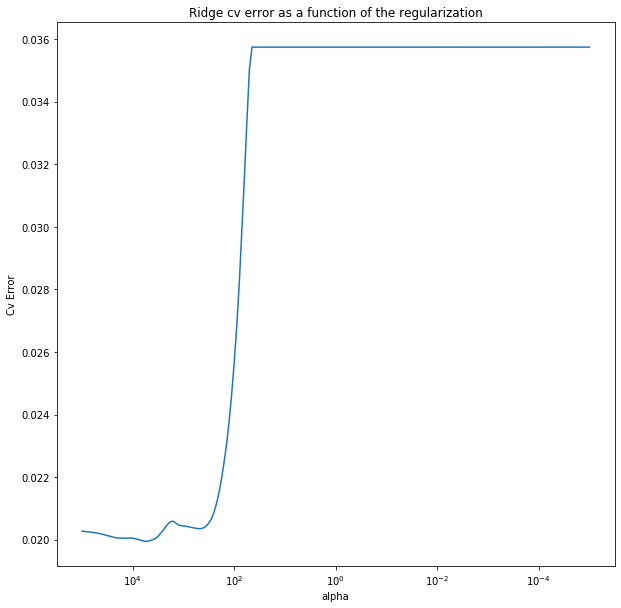

In [375]:
ax = plt.gca()

ax.plot(alphas, cv_mse)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('Cv Error')
plt.title('Ridge cv error as a function of the regularization')
plt.axis('tight')
plt.show()